<a href="https://colab.research.google.com/github/rishabh010105/Heart-Disease-classification/blob/main/end_to_end_hear_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predict Heart Disease Using Machine Learning

### Problem Defination

>Given clinical parameter about a pateint, can we predict wheter or not they have heart disese

### Data

Data is taken from UCI and is also available on Kaggle
Link : https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

### Evaluation
> If we can reach 95% accuracy in cheacking wheter the patient has heart disease or not during the proof of concept , we will purse the project

### Features

Description of each data or column of the data

**Create a data dictionary Dictionary**

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute

### Preparing the tool



In [ ]:
# Import all tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Scikit Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import recall_score,f1_score,precision_score



## Load Data

In [ ]:
df=pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration (EDA)
The goal is to know every thing about the data in the dataset and having knowledge about

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

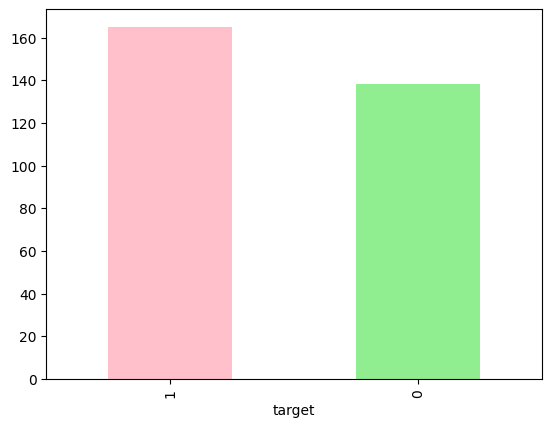

In [ ]:
df["target"].value_counts().plot(kind="bar",color=["pink","lightgreen"])

In [ ]:
#checking missing data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## HeartDisease Frequency according to sex


In [ ]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
a=pd.crosstab(df.target,df.sex)

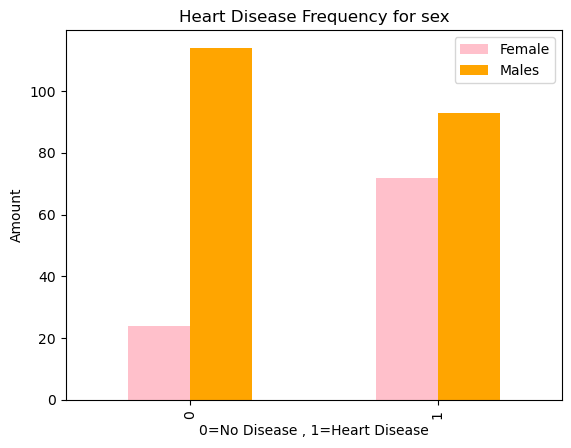

In [ ]:
#Create a plot of cross tab

a.plot(kind="bar",color=["pink","orange"])

plt.title("Heart Disease Frequency for sex")
plt.xlabel("0=No Disease , 1=Heart Disease")
plt.ylabel("Amount")
plt.legend(["Female","Males"])

### Age vs Max Heart Rate For Disease

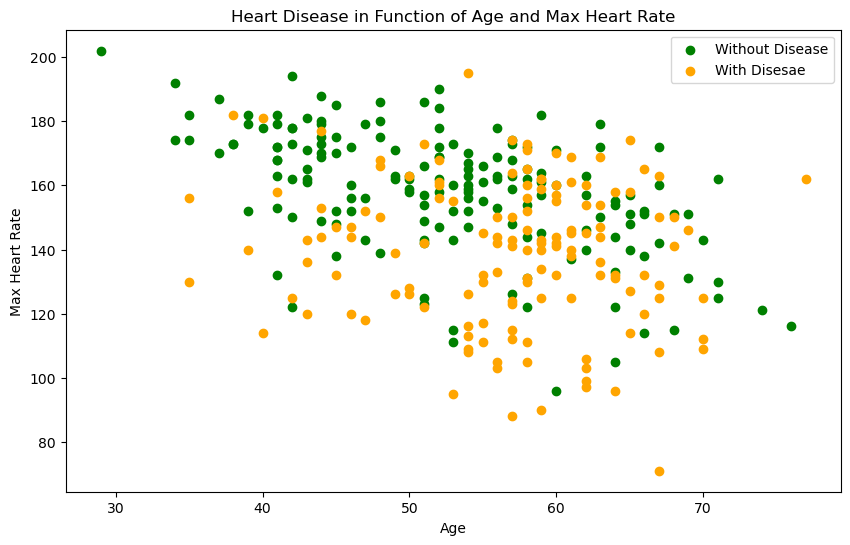

In [ ]:
plt.figure(figsize=(10,6))

#With Disese
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color="green")

#Without Disease
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color="orange")

# Add title and Legend

plt.title("Heart Disease in Function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Without Disease","With Disesae"]);

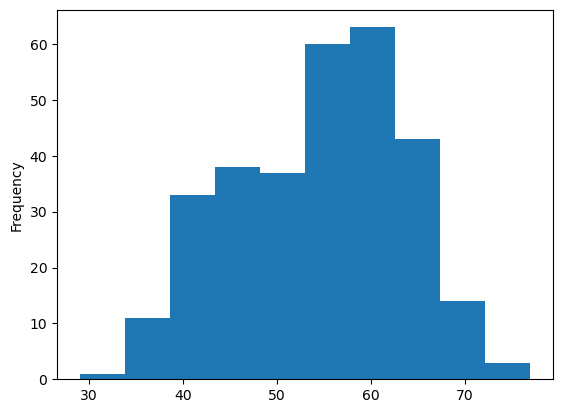

In [ ]:
# Check Distribution of Age
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain


In [ ]:
b=pd.crosstab(df.cp,df.target)

In [ ]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

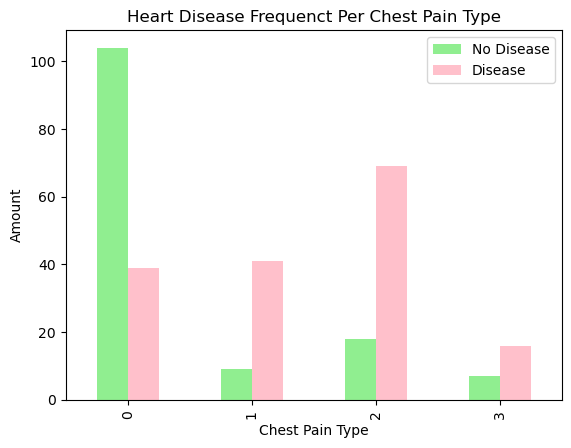

In [ ]:
b.plot(kind="bar",color=["LightGreen","Pink"])
plt.title("Heart Disease Frequenct Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"]);

In [ ]:
# Make Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


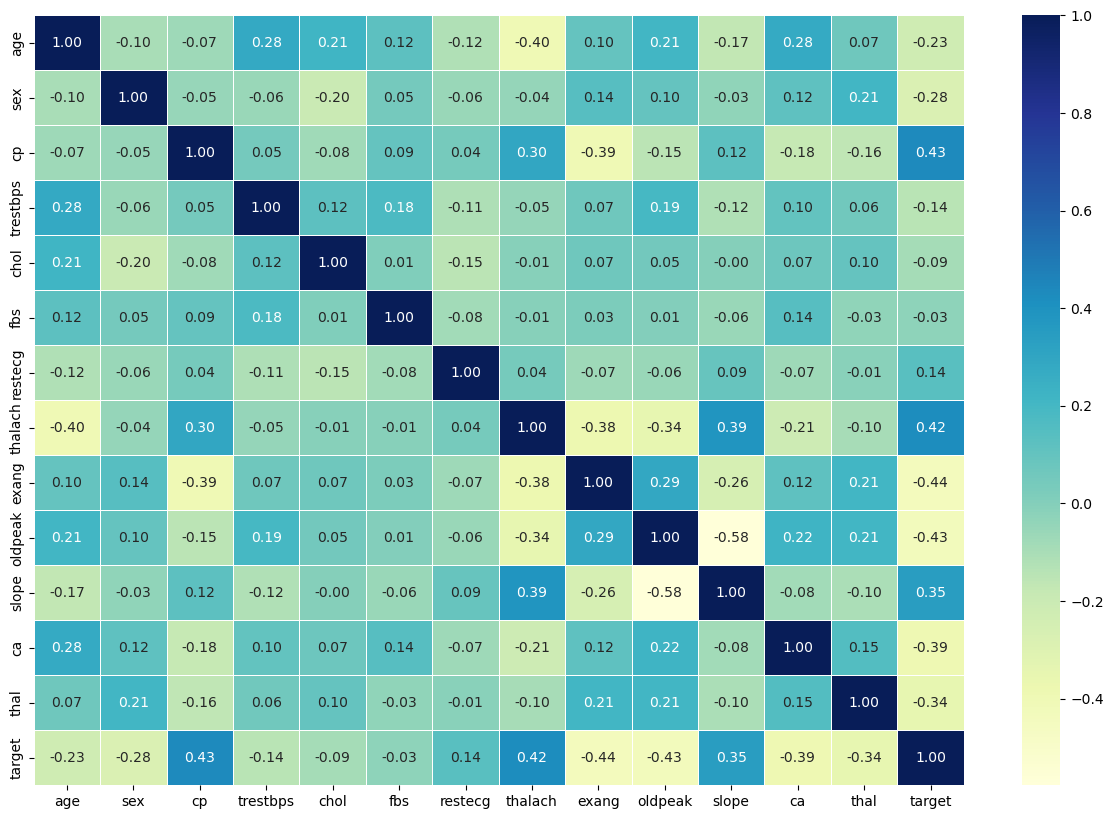

In [ ]:
# Lets make ouur corellation matrix more organised
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5
               ,fmt=".2f",cmap="YlGnBu")

## Modelling

In [ ]:
#Split data into X and Y
X=df.drop("target",axis=1)
Y=df["target"]


In [ ]:
# SPlit data in train and test set

np.random.seed(42)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)




Time to built machine learning model



In [ ]:
# Put model in Dictionaries

models= {"Logistic Regression": LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()}

#Create a function to fit and score models

def fit_and_score(model,X_train,X_test,Y_train,Y_test):
    np.random.seed(42)
    model_score={}

    #Loop through model
    for name,model in models.items():
        model.fit(X_train,Y_train)
        # Evaluate the model
        model_score[name]=model.score(X_test,Y_test)
    return model_score


In [ ]:
model_scores=fit_and_score(model=models,X_train=X_train,X_test=X_test,Y_train=Y_train,Y_test=Y_test)

model_scores

C:\Users\acer\Desktop\heart-disease-project-1\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparision

<AxesSubplot:>

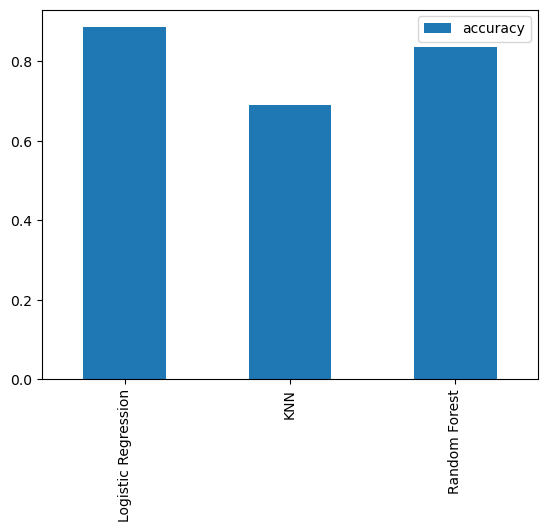

In [ ]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()

### Look at the Following for Imroving our Model:

* Hyperparameter Tuning
* Feature Importance

####  For Classification Models

* Confusion Matrix
* Cross Validation
* Precision
* REcall
* f1 score
* Classifiaction Report
* ROC Curve
* Area under the curve(AUC)



## Hyperparameter Tuning


In [ ]:
# For KNN

train_scores =[]
test_scores=[]

# Create a list of different value of n_neighbours
neighbors = range(1,21)

knn=KNeighborsClassifier()

#Loop for diff vaue of neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)

    #Fit the algorithm

    knn.fit(X_train,Y_train)

    # Update the training score list
    train_scores.append(knn.score(X_train,Y_train))

    # Update the test score list
    test_scores.append(knn.score(X_test,Y_test))


In [ ]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

In [ ]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


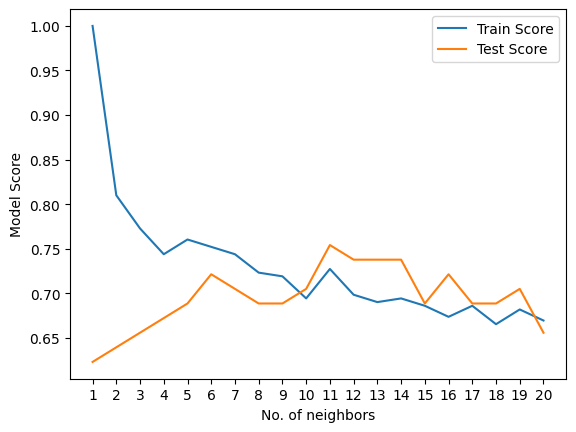

In [ ]:
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.ylabel("Model Score")
plt.xlabel("No. of neighbors")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter Tuning with RandamizeSearchCV

We are going to tune

* LogisticRegression()
* RandomForestClassification

using RandomiszedSearchCV

In [ ]:
# Hyperparameter grid for LogisticRegression
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}

# HyperParameter grid for RandomForestClassifier
rf_grid={"n_estimators": np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)
        }

In [ ]:
#Tune LogisticRegression

np.random.seed(42)


rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)


rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
rs_log_reg.score(X_test,Y_test)

0.8852459016393442

In [ ]:
# Now tune Random Forest CLassiffier

np.random.seed(42)


rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)


rs_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [ ]:
rs_rf.score(X_test,Y_test)

0.8688524590163934

In [ ]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Hyperpsrsmeter tuning using GridSearchCV

Logistic Regression has the best evaluation score

In [ ]:
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(X_train,Y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
gs_log_reg.score(X_test,Y_test)

0.8852459016393442

## Evaluating our tuned ML classifeir
 * ROC curve and AUC score
 *   COnfusion Matrix
 *  Classification Report
 *  Precision
 *   REcall
 *  F1 score
    

In [ ]:
#Make prediction

Y_pred=gs_log_reg.predict(X_test)

In [ ]:
Y_pred


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [ ]:
Y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

C:\Users\acer\Desktop\heart-disease-project-1\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


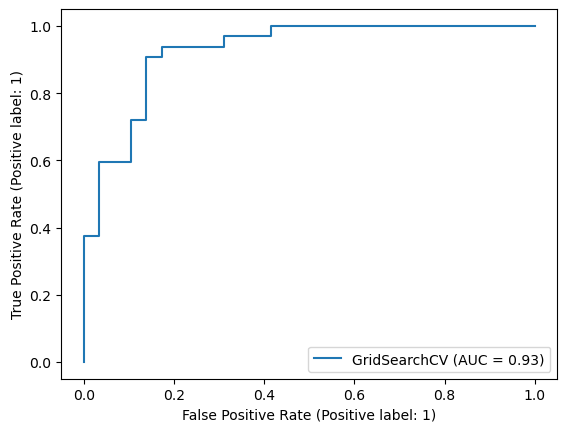

In [ ]:
# Creating ROC curve
plot_roc_curve(gs_log_reg,X_test,Y_test)

In [ ]:
# Confusion mAtrix

print(confusion_matrix(Y_test,Y_pred))

[[25  4]
 [ 3 29]]


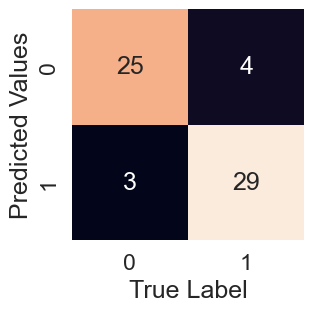

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(Y_test,Y_pred):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(Y_test,Y_pred),
                   annot=True,
                   cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Values")

plot_conf_mat(Y_test,Y_pred)


In [ ]:
# Classification Report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate Evaluation Mertrics using cross-validation

In [ ]:
# Check best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [ ]:
# Create a new classifier with best parameter

model= LogisticRegression(C=0.20433597178569418,
                          solver="liblinear")

In [ ]:
# Cross validate Accuracy
cv_acc= cross_val_score(model,X,Y,
                       cv=5,
                       scoring="accuracy")


In [ ]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [ ]:
# Cross validate Precision

cv_precision= cross_val_score(model,X,Y,
                       cv=5,
                       scoring="precision")
cv_precision=cv_precision= np.mean(cv_precision)
cv_precision


0.8207936507936507

In [ ]:
# Cross validate Reacall

cv_recall= cross_val_score(model,X,Y,
                       cv=5,
                       scoring="recall")
cv_recall=cv_recall = np.mean(cv_recall)
cv_recall


0.9212121212121213

In [ ]:
# Cross validate F1

cv_f1= cross_val_score(model,X,Y,
                       cv=5,
                       scoring="f1")
cv_f1=cv_f1 = np.mean(cv_f1)
cv_f1


0.8673007976269721

<Axes: title={'center': 'Cross Validation Matrix'}>

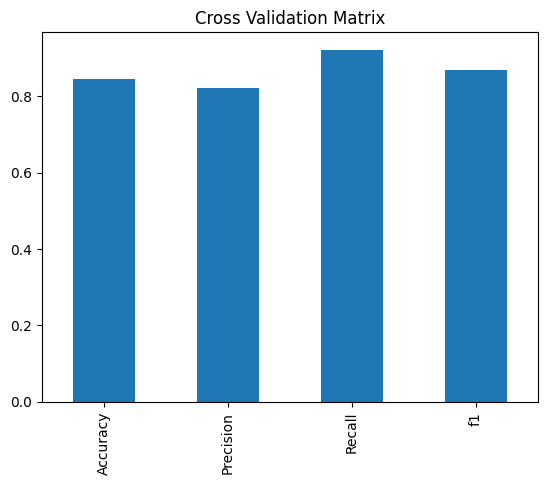

In [ ]:
# Visualise a cross - validated metrices

cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_precision,
                         "Recall":cv_recall,
                         "f1":cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross Validation Matrix",
                     legend=False)

### Feature Importance

Feature importance is another as asking "Which feature contributed the most to the outcome of the model and how did they contribute?"

In [ ]:
model

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [ ]:
model.fit(X_train,Y_train);

In [ ]:
model.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [ ]:
# March Coef of feature to columns

feauture_dict = dict(zip(df.columns,list(model.coef_[0])))
feauture_dict


{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

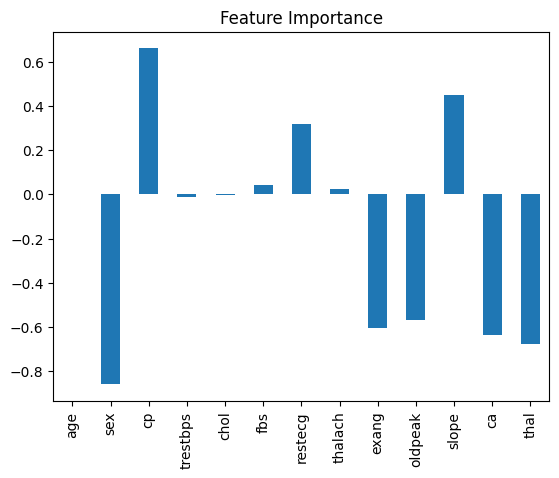

In [ ]:
#Visualise feature Importance

feauture_df = pd.DataFrame(feauture_dict,index=[0])
feauture_df.T.plot.bar(title="Feature Importance",legend=False);



In [ ]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [ ]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
